In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sys
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

sys.path.append(os.path.abspath(os.path.join('..')))


In [2]:

# --- 1. Load Data & Model ---
print("Loading data and model...")
df = pd.read_csv('../data/processed/processed_data.csv')
df.dropna(subset=['cleaned_text'], inplace=True)

# Load artifacts
with open('../models/hate_speech_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('../models/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


Loading data and model...


In [3]:

# --- 2. Prepare Test Set ---
X = vectorizer.transform(df['cleaned_text'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# --- 3. Predictions ---
y_pred = model.predict(X_test)


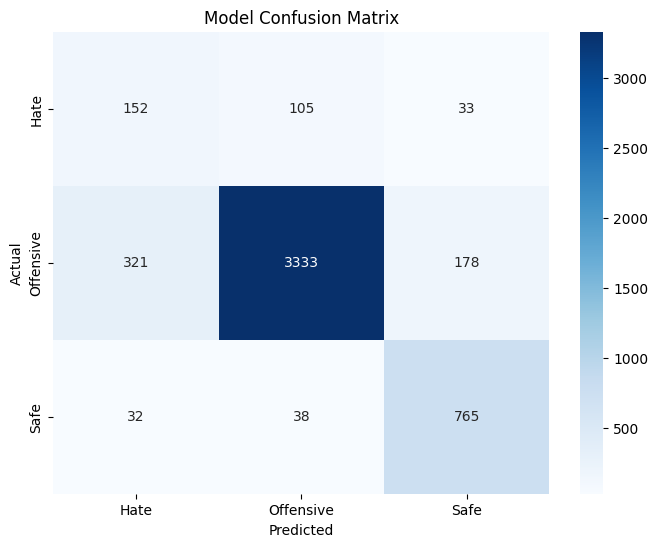


Detailed Performance Metrics:


,precision,recall,f1-score,support
Hate,0.300990,0.524138,0.382390,290.000000
Offensive,0.958861,0.869781,0.912151,3832.000000
Safe,0.783811,0.916168,0.844837,835.000000
accuracy,0.857373,0.857373,0.857373,0.857373
macro avg,0.681221,0.770029,0.713126,4957.000000
weighted avg,0.890886,0.857373,0.869819,4957.000000


In [5]:

# --- 4. Visualizations ---

# A. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hate', 'Offensive', 'Safe'], 
            yticklabels=['Hate', 'Offensive', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model Confusion Matrix')
plt.show()

# B. Classification Report Table
report = classification_report(y_test, y_pred, target_names=['Hate', 'Offensive', 'Safe'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nDetailed Performance Metrics:")
display(report_df)


In [6]:

# --- 5. Interactive Testing ---
print("\n--- Test Your Model Here ---")
sample_text = "I hate you so much"
clean_sample = sample_text
vec_sample = vectorizer.transform([clean_sample])
pred = model.predict(vec_sample)[0]
labels = {0: "HATE SPEECH", 1: "OFFENSIVE", 2: "SAFE"}
print(f"Input: '{sample_text}'")
print(f"Prediction: {labels[pred]}")


--- Test Your Model Here ---
Input: 'I hate you so much'
Prediction: SAFE
